(100, 100)
(100, 100)


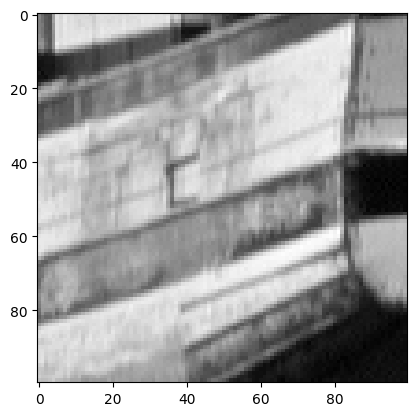

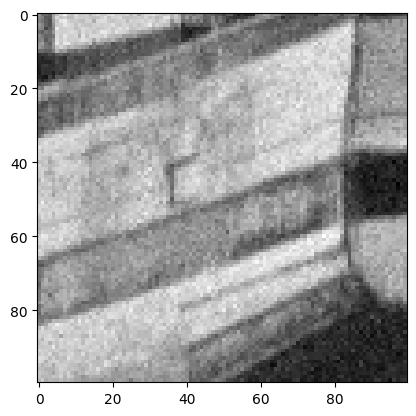

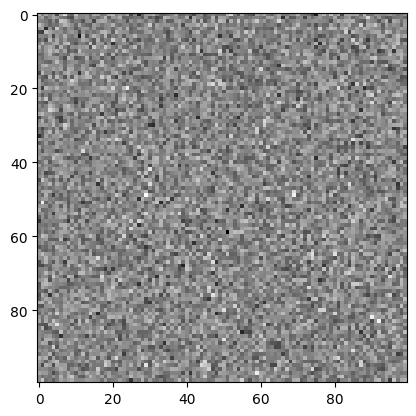

In [59]:
# Alex Domagala
# ECE 6560

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../images/boats.bmp')
img = np.array(img)
img = img[300:400,300:400]
print(img.shape)
#noise = 10*np.random.randn(img.shape[0],img.shape[1]) # standard normal distribution
mean = 0
std_dev = 10
noise = np.random.normal(mean, std_dev, (img.shape[0],img.shape[1]))


# #salt and pepper noise
# for i in range(img.shape[0]):
#   for j in range(img.shape[1]):
#     if (np.random.randint(0, 100) == 3):
#       img[i][j] = 1


print(noise.shape)
plt.imshow(img,cmap='gray')
plt.show()
img2 = img + noise
plt.imshow(img2, cmap='gray')
plt.show()
plt.imshow(noise, cmap='gray')
plt.show()

In [43]:
def GradientHist(I):
  Inew = I
  timestep = .1

  gradients = []
  # iterate through all the pixels in the image
  for i in range(1,I.shape[0]-1):
    for j in range(1,I.shape[1]-1):
      Ix = (I[i+1,j] - I[i-1,j])/2
      Iy = (I[i,j+1] - I[i,j-1])/2
      ret = np.sqrt(np.power(Ix,2) + np.power(Iy,2))
      gradients.append(ret)
  return gradients

grads = GradientHist(img)
grads2 = GradientHist(img2)
gradNoise = GradientHist(noise)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5804\1634994666.py:10: RuntimeWarning: overflow encountered in scalar subtract
  Iy = (I[i,j+1] - I[i,j-1])/2
C:\Users\Admin\AppData\Local\Temp\ipykernel_5804\1634994666.py:9: RuntimeWarning: overflow encountered in scalar subtract
  Ix = (I[i+1,j] - I[i-1,j])/2


180.31222920256963
97.58960944646667
60.95354392278283


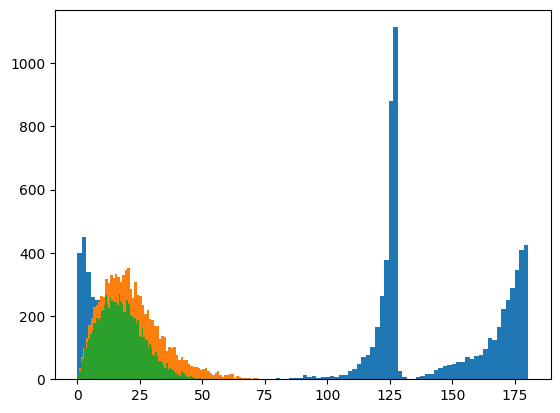

In [60]:
plt.hist(grads,bins=100)
plt.hist(grads2,bins=100)
plt.hist(gradNoise,bins=100)
print(np.max(grads))
print(np.max(grads2))
print(np.max(gradNoise))